In [48]:
#评估算法

In [46]:
#10折交叉验证

In [47]:
cv<-trainControl(method="cv",number=10,metric<-"Accuracy")

In [49]:
#建立模型

In [50]:
#a)linear algorithms

In [51]:
set.seed(7)

In [53]:
fit.lda<-train(Species~.,data=train,method="lda",metric=metric,trControl=cv)

In [54]:
#CART

In [55]:
set.seed(7)

In [56]:
fit.cart<-train(Species~.,data=train,method="rpart",metric=metric,trControl=cv)

Loading required package: rpart


In [57]:
#KNN

In [58]:
fit.knn<-train(Species~.,data=train,method="knn",metric=metric,trControl=cv)

In [60]:
#SVM

In [61]:
fit.svm<-train(Species~.,data=train,method="svmRadial",metric=metric,trControl=cv)

Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [62]:
#Rf

In [63]:
fit.rf<-train(Species~.,data=train,method="rf",metric=metric,trControl=cv)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [64]:
results<-resamples(list(lda=fit.lda,cart=fit.cart,knn=fit.knn,svm=fit.svm,rf=fit.rf))#检查模型是可以比较的

In [65]:
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.9091  0.9375 1.0000 0.9742       1    1    0
cart 0.8182  0.8365 0.9167 0.9149       1    1    0
knn  0.8333  0.9423 1.0000 0.9673       1    1    0
svm  0.8333  0.9167 0.9583 0.9417       1    1    0
rf   0.8333  0.9167 1.0000 0.9513       1    1    0

Kappa 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.8642  0.9062 1.0000 0.9614       1    1    0
cart 0.7250  0.7545 0.8750 0.8725       1    1    0
knn  0.7500  0.9122 1.0000 0.9508       1    1    0
svm  0.7447  0.8740 0.9375 0.9118       1    1    0
rf   0.7500  0.8750 1.0000 0.9268       1    1    0


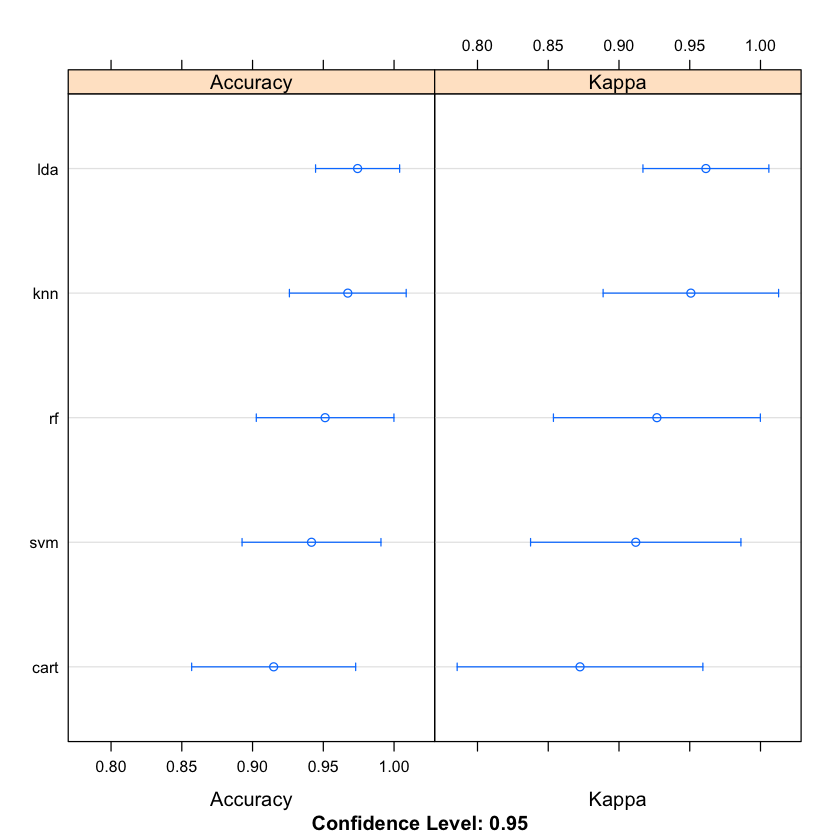

In [66]:
dotplot(results)

In [67]:
print(fit.lda)#模型精度在97%+/-4%

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 109, 108, 107, 109, 109, ... 
Resampling results

  Accuracy   Kappa      Accuracy SD  Kappa SD  
  0.9742424  0.9614198  0.04152486   0.06218963

 


In [68]:
#预测

In [69]:
predictions<-predict(fit.lda,test)

In [70]:
confusionMatrix(predictions,test$Species)#混淆矩阵，精度评价

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          8          0         0
  versicolor      0          9         0
  virginica       0          0        13

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.4333     
    P-Value [Acc > NIR] : 1.273e-11  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000               1.0           1.0000
Specificity                 1.0000               1.0           1.0000
Pos Pred Value              1.0000               1.0           1.0000
Neg Pred Value              1.0000               1.0           1.0000
Prevalence                  0.2667               0.3           0.4333
Detection Rate